In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%matplotlib inline

In [3]:
kdf =pd.read_csv('Classified Data', index_col=0)

In [4]:
kdf.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


## We need to standardised our data

In [7]:
from sklearn.preprocessing import StandardScaler

In [8]:
Scaler =StandardScaler()

In [11]:
Scaler.fit(kdf.drop('TARGET CLASS', axis=1))

StandardScaler()

In [12]:
scale_feature =Scaler.transform(kdf.drop('TARGET CLASS', axis=1))

In [13]:
df_feat =pd.DataFrame(scale_feature, columns=kdf.columns[:-1])

In [14]:
df_feat.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
0,-0.123542,0.185907,-0.913431,0.319629,-1.033637,-2.308375,-0.798951,-1.482368,-0.949719,-0.643314
1,-1.084836,-0.430348,-1.025313,0.625388,-0.444847,-1.152706,-1.129797,-0.202240,-1.828051,0.636759
2,-0.788702,0.339318,0.301511,0.755873,2.031693,-0.870156,2.599818,0.285707,-0.682494,-0.377850
3,0.982841,1.060193,-0.621399,0.625299,0.452820,-0.267220,1.750208,1.066491,1.241325,-1.026987
4,1.139275,-0.640392,-0.709819,-0.057175,0.822886,-0.936773,0.596782,-1.472352,1.040772,0.276510


## Now we can perform the training on the dataset

In [15]:
from sklearn.model_selection import train_test_split

In [20]:
X =df_feat
y =kdf['TARGET CLASS']

In [21]:
(X_train, x_test, y_train, y_test) = train_test_split(X,y, test_size=0.3, random_state=101)

In [22]:
from sklearn.neighbors import KNeighborsClassifier

In [23]:
knn =KNeighborsClassifier(n_neighbors=1)

In [25]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [26]:
y_pred =knn.predict(x_test)

In [29]:
#y_pred

## Model evaluation

In [28]:
from sklearn.metrics import classification_report, confusion_matrix

In [30]:
print(classification_report(y_test, y_pred))
print('\n')
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.95      0.93       159
           1       0.94      0.89      0.92       141

    accuracy                           0.92       300
   macro avg       0.92      0.92      0.92       300
weighted avg       0.92      0.92      0.92       300



[[151   8]
 [ 15 126]]


In [36]:
# calculate the mean of the errors and store in a list
error_rate =[]
for i in range(1,50):
    knn =KNeighborsClassifier(n_neighbors =i)
    knn.fit(X_train,y_train)
    y_pred =knn.predict(x_test)
    error_rate.append(np.mean(y_pred !=y_test))

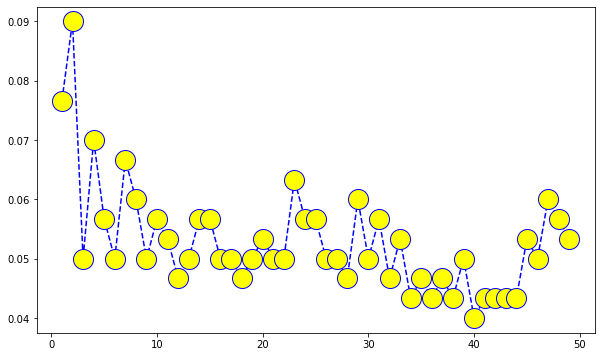

In [56]:
plt.figure(figsize=(10,6))
plt.plot(range(1,50), error_rate, color='blue',linestyle='dashed', marker='o', markerfacecolor='yellow', markersize=20)

In [49]:
knn=KNeighborsClassifier(n_neighbors=40)

In [50]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=40)

In [51]:
y_preds =knn.predict(x_test)

In [52]:
print(classification_report(y_test, y_preds))
print('\nThe confusion matrix')
print(confusion_matrix(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.96      0.97      0.96       159
           1       0.96      0.95      0.96       141

    accuracy                           0.96       300
   macro avg       0.96      0.96      0.96       300
weighted avg       0.96      0.96      0.96       300


The confusion matrix
[[154   5]
 [  7 134]]


In [57]:
confusion_matrix(y_test,y_preds)

array([[154,   5],
       [  7, 134]], dtype=int64)

In [58]:
classification_report(y_test, y_preds)

'              precision    recall  f1-score   support\n\n           0       0.96      0.97      0.96       159\n           1       0.96      0.95      0.96       141\n\n    accuracy                           0.96       300\n   macro avg       0.96      0.96      0.96       300\nweighted avg       0.96      0.96      0.96       300\n'

In [59]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.96      0.97      0.96       159
           1       0.96      0.95      0.96       141

    accuracy                           0.96       300
   macro avg       0.96      0.96      0.96       300
weighted avg       0.96      0.96      0.96       300

